In [1]:
# Natural Language Tool Kit (NLTK)
import nltk
nltk.download('stopwords')
nltk.download('punkt')
# Regular Expression for text preprocessing
import re
# Heap (priority) queue algorithm to get the top sentences
import heapq
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ewilens/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/ewilens/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
def get_text(text_file):
    """Takes a .txt file and returns the text, as well as the cleaned text. """
    
    with open(text_file, 'r') as f:
        text = f.read()
        
    # replace reference number (i.e. [n]) with empty space, if any..
    clean_text = re.sub(r'\[[0-9]*\]',' ', text)
    # replace one or more spaces with one space
    clean_text = re.sub(r'\s+',' ',clean_text)
    # convert all uppercase characters into lowercase characters
    clean_text = clean_text.lower()
    # replace character other than [a-zA-Z0-9]
    clean_text = re.sub(r'\W',' ',clean_text)
    # replace digit with empty
    clean_text = re.sub(r'\d',' ',clean_text)
    
    return text, clean_text


def rank_sentence(text, clean_text):
    """Splits text string into sentences. """
    
    sentences = nltk.sent_tokenize(text)
    stop_words = nltk.corpus.stopwords.words('english')
    
    word_count = {}
    words = nltk.word_tokenize(clean_text)
    for word in words:
        if word not in stop_words:
            word_count[word] = word_count.get(word, 0) + 1
            
    sentence_score = {}
    
    for sentence in sentences:
        sentence_words = nltk.word_tokenize(sentence.lower())
        num_words = len(sentence.split(' '))
        
        for word in sentence_words:
            if word in word_count.keys():
                # only take sentence that has less than 30 words
                if num_words < 30:
                    # add word score to sentence score
                    sentence_score[sentence] = sentence_score.get(sentence, 0) + word_count[word]
    
    return sentence_score, word_count

[]

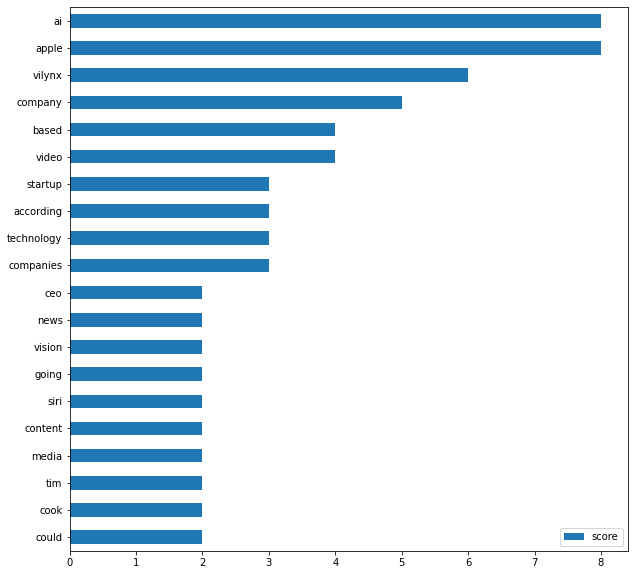

In [10]:
# Jupyter Notebook only - Plot top words

text, clean_text = get_text("Apple-Acquires-AI-Startup.txt")
_, word_count = rank_sentence(text, clean_text)

def plot_top_words(word_count, show_top_n=20):
    word_count_table = pd.DataFrame.from_dict(word_count, orient = 'index').rename(columns={0: 'score'})
    word_count_table.sort_values(by='score').tail(show_top_n).plot(kind='barh', figsize=(10,10))
    return plt

plot_top_words(word_count).plot()

In [11]:
# For Jupyter Notebook Only (Not App) - show DataFrame with the top ranked sentences
text, clean_text = get_text("Apple-Acquires-AI-Startup.txt")
sentence_score, _ = rank_sentence(text, clean_text)

def scores_to_df(sentence_score):
    """Takes sentence score dictionary and turns it into sorted DataFrame. """
    
    sentence_score_df = pd.DataFrame.from_dict(sentence_score, orient='index').rename(columns={0: 'score'})
    sentence_score_df = sentence_score_df.sort_values(by='score', ascending = False)
    return sentence_score_df
    

sentence_score_df = scores_to_df(sentence_score)
sentence_score_df

score
In an attempt to scale up its AI portfolio, App...     44
With CEO Tim Cook’s vision of the potential of ...     31
With its habit of quietly purchasing smaller co...     28
This helps it categorising and tagging metadata...     27
In 2018, CEO Tim Cook said in an interview that...     25

In [ ]:
def get_best_sentences(sentence_score_dict):
    """Takes the sentence scores and returns a list of the top n sentences. """
    
    best_sentences = heapq.nlargest(3, sentence_score, key=sentence_score.get)
    return best_sentences

best_sentences = get_best_sentences(sentence_score)
best_sentences

In [ ]:
def display_summary(best_sentences_list):
    """Outputs summary to the screen. """
    
    print('SUMMARY')
    print('-------------------')
    
    i = 1
    for sentence in best_sentences:
        print("{}: {}".format(i, sentence))
        i += 1

display_summary(best_sentences)